In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd

df_path = "data/raw/debunking_review.tsv"
df = pd.read_csv(df_path, sep="\t")

In [ ]:
from eppi_text_classification import OptunaHyperparameterOptimisation

optuna = OptunaHyperparameterOptimisation(
    df,
    "text",
    "label",
    "bert-base-uncased",
    "data/processed/debunking_review_optuna_hyperparameter_optimisation.csv",
)

In [2]:
from eppi_text_classification import get_features_and_labels, get_tfidf_and_names


word_features, labels = get_features_and_labels(df)

tfidf_scores, feature_names = get_tfidf_and_names(word_features)

print(tfidf_scores.dtype)

NameError: name 'Any' is not defined

In [ ]:
get_features_and_labels()

In [17]:
print(feature_names)

['a_' 'a_ a_<' 'a_ a_< a_' ... 't_young' 't_youth' 't_zika']


NameError: name 'prn' is not defined

In [24]:
def count_words_starting_with_zero(features):
    # Dictionary to store the count of each word starting with '0'
    word_count = {}

    # Iterate through each string in the list
    for feature in features:
        # Split the string into words
        # Filter and count words starting with '0'
        if "a_0" in feature:
            # If the word starts with '0', add/increment it in the dictionary
            if feature in word_count:
                word_count[feature] += 1
            else:
                word_count[feature] = 1

    return word_count


ouput_dict = count_words_starting_with_zero(feature_names)
for key, value in ouput_dict.items():
    print(key, value)

a_0 1
a_0.0001 1
a_0.001 1
a_0.01 1
a_0.03 1
a_0.05 1
a_0.11 1
a_0.12 1
a_0.39 1
a_0.40 1
a_001 1
a_< a_0.001 1
a_< a_0.05 1
a_lt a_0.001 1
a_p a_< a_0.001 1
a_p a_< a_0.05 1
a_p a_lt a_0.001 1


In [23]:
print(len(feature_names))

9753


In [26]:
for i, features in enumerate(feature_names):
    print(i, features)

0 a_
1 a_ a_<
2 a_ a_< a_
3 a_ a_=
4 a_ a_= a_
5 a_ a_assess
6 a_ a_conclusion
7 a_ a_conclusion a_
8 a_ a_conclusions
9 a_ a_conclusions a_
10 a_ a_conduct
11 a_ a_despite
12 a_ a_examine
13 a_ a_finding
14 a_ a_method
15 a_ a_method a_
16 a_ a_methods
17 a_ a_methods a_
18 a_ a_misinformation
19 a_ a_objective
20 a_ a_objective a_
21 a_ a_parent
22 a_ a_research
23 a_ a_result
24 a_ a_result a_
25 a_ a_results
26 a_ a_study
27 a_ a_study a_investigate
28 a_ a_vaccine
29 a_ a_year
30 a_$
31 a_+
32 a_.001
33 a_.003
34 a_0
35 a_0.0001
36 a_0.001
37 a_0.01
38 a_0.03
39 a_0.05
40 a_0.11
41 a_0.12
42 a_0.39
43 a_0.40
44 a_001
45 a_1
46 a_1 a_2
47 a_1 a_3
48 a_1 a_5
49 a_1 a_background
50 a_1 a_find
51 a_1 a_misinformation
52 a_1 a_month
53 a_1 a_n
54 a_1 a_n a_=
55 a_1 a_participant
56 a_1 a_reveal
57 a_1 a_show
58 a_1 a_study
59 a_1 a_vaccine
60 a_1 a_week
61 a_1.0
62 a_1.00
63 a_1.01
64 a_1.04
65 a_1.05
66 a_1.1
67 a_1.21
68 a_1.3
69 a_1.37
70 a_1.5
71 a_1.7
72 a_1.8
73 a_10
74 a_10 a_ye

In [3]:
float(None)

TypeError: float() argument must be a string or a real number, not 'NoneType'

In [15]:
def count_words_starting_with_zero(strings):
    # Dictionary to store the count of each word starting with '0'
    word_count = {}

    # Iterate through each string in the list
    for s in strings:
        # Split the string into words
        words = s.split()
        # Filter and count words starting with '0'
        for word in words:
            if word.startswith("0"):
                # If the word starts with '0', add/increment it in the dictionary
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1

    return word_count


# Example list of strings
example_strings = [
    "0apple 0orange banana",
    "0grape 0apple cherry",
    "0orange",
    "apple 0grapefruit",
]

# Counting the words starting with '0'
result = count_words_starting_with_zero(example_strings)

# Printing the result
print(result)

{'0apple': 2, '0orange': 2, '0grape': 1, '0grapefruit': 1}


In [ ]:
def process_chunk2(texts):
    stop_words = set(stopwords.words("english"))

    all_punct = string.punctuation

    hyphen_excluded_punct = all_punct.replace("-", "")
    translator = str.maketrans("", "", hyphen_excluded_punct)

    processed_texts = []
    for text in texts:
        filtered_words = [
            word.translate(translator).lower()
            for word in text.split()
            if word.lower() not in stop_words
        ]

        processed_texts.append([word for word in filtered_words if word])
    return processed_texts

In [8]:
import pandas as pd

df_path = "data/raw/studytype_multiclass.tsv"
df = pd.read_csv(df_path, sep="\t")

In [7]:
from eppi_text_classification import (
    get_features_and_labels,
    get_tfidf_and_names,
)

word_features, labels = get_features_and_labels(
    df, title_key="TI", abstract_key="AB", y_key="Class"
)

tfidf_scores, feature_names = get_tfidf_and_names(word_features)

In [ ]:
print(len())

In [5]:
from xgboost import XGBClassifier


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    colsample_bytree=1,
    n_jobs=-1,
    scale_pos_weight=42,
    reg_lambda=0.017636592766577953,
    reg_alpha=0.03834292094431529,
    learning_rate=0.4507787503025981,
    n_estimators=557,
    gamma=6.384905359051449e-10,
    max_depth=2,
)

X_train, X_test, y_train, y_test = train_test_split(
    tfidf_scores, labels, test_size=0.333, stratify=labels, random_state=7
)

model.fit(X_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14], got ['CaseControlStudies' 'CaseReports' 'ClinicalTrial'
 'ClinicalTrialProtocol' 'CohortStudies' 'Comment' 'CrossSectional'
 'Editorial' 'Guideline' 'Letter' 'MetaAnalysis' 'QualitativeStudies'
 'RandomizedControlTrial' 'Review' 'SystematicReview']

In [15]:
model.predict(X_test, output_margin=True)[0]

-8.82405

In [16]:
from scipy.sparse import csr_matrix

X_test_new = csr_matrix(X_test)
X_test_list = list(X_test)

model.predict(X_test_new, output_margin=True)[0]

12.102227

In [2]:
import optuna

storage_url = "sqlite:///optuna.db"
study_names = optuna.get_all_study_summaries(storage=storage_url)

for study_name in study_names:
    optuna.delete_study(study_name=study_name.study_name, storage=storage_url)

In [4]:
from pydantic import BaseModel, model_validator, Field
from pydantic import ValidationError


class UserModel(BaseModel):
    username: str = Field(..., min_length=3)
    password: str

    @model_validator(mode="before")
    def strip_username(cls, values):
        values["username"] = values["username"].strip()
        return values


# Example usage
try:
    user = UserModel(username="  john_doe  ", password="s3cr3t")
    print(user)
except ValidationError as e:
    print(e)

username='john_doe' password='s3cr3t'


In [15]:
from pydantic import BaseModel, Field


class Foo(BaseModel):
    positive: int = Field(gt=0)
    non_negative: int = Field(ge=0)
    negative: int = Field(lt=0)
    non_positive: int = Field(le=0)
    even: int = Field(multiple_of=2)
    love_for_pydantic: float = Field(allow_inf_nan=True)


foo = Foo(
    positive=-1,
    non_negative=0,
    negative=-1,
    non_positive=0,
    even=2,
    love_for_pydantic=float("inf"),
)
print(foo)

ValidationError: 1 validation error for Foo
positive
  Input should be greater than 0 [type=greater_than, input_value=-1, input_type=int]
    For further information visit https://errors.pydantic.dev/2.7/v/greater_than

In [16]:
from pydantic import BaseModel, Field


class MyModel(BaseModel):
    names: list[str] = Field(min_length=1)


# Example usage
try:
    model = MyModel(names=[])
except ValidationError as e:
    print(e)

1 validation error for MyModel
names
  List should have at least 1 item after validation, not 0 [type=too_short, input_value=[], input_type=list]
    For further information visit https://errors.pydantic.dev/2.7/v/too_short


In [5]:
from datetime import datetime
from typing import Optional

from pydantic import BaseModel, ValidationError


class User(BaseModel):
    id: int
    name: str = "John Doe"
    signup_ts: Optional[datetime] = None


me = User(id=1, name="Jo", signup_ts=datetime.now())

In [6]:
class MyClass:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return f"MyClass(x={self.x!r}, y={self.y!r})"


# Example usage
obj = MyClass(10, 20)
print(repr(obj))  # Output: MyClass(x=10, y=20)
print(obj)  # Output: MyClass(x=10, y=20)

MyClass(x=10, y=20)
MyClass(x=10, y=20)


In [8]:
from typing import Any, Generic, Tuple, Type, TypeVar

from pydantic import BaseModel

DataT = TypeVar("DataT")


class Response(BaseModel, Generic[DataT]):
    data: DataT

    @classmethod
    def model_parametrized_name(cls, params: Tuple[Type[Any], ...]) -> str:
        return f"{params[0].__name__.title()}Response"


print(repr(Response[int](data=1)))
# > IntResponse(data=1)
print(repr(Response[str](data="a")))
# > StrResponse(data='a')

TypeError: Response.model_parametrized_name() missing 1 required positional argument: 'params'

In [12]:
class CumulativePowerFactory:
    def __init__(self, exponent=2, *, start=0):
        self._exponent = exponent
        self.total = start

    def __call__(self, base):
        power = base**self._exponent
        self.total += power
        return power


c = CumulativePowerFactory(3, start=1)

T(x='cow', y=2)


[1, 2, 3, 4, 5, 5]


In [20]:
from datetime import datetime, timezone
from uuid import UUID, uuid4

from pydantic import BaseModel, Field


def datetime_now() -> datetime:
    return datetime.now(timezone.utc)


class Model(BaseModel):
    uid: UUID = Field(default_factory=uuid4)
    updated: datetime = Field(default_factory=datetime_now)


m1 = Model()
m2 = Model()
print(m1)
print(m2)
assert m1.uid != m2.uid

uid=UUID('463fbfbd-c53e-4f43-a049-c84020105b7e') updated=datetime.datetime(2024, 6, 27, 19, 48, 48, 697451, tzinfo=datetime.timezone.utc)
uid=UUID('6f273c27-72a9-4192-8b4b-50dfab92541e') updated=datetime.datetime(2024, 6, 27, 19, 48, 48, 697488, tzinfo=datetime.timezone.utc)


In [21]:
match event.get():
    case Click(position=(x, y)):
        handle_click_at(x, y)
    case KeyPress(key_name="Q") | Quit():
        game.quit()
    case KeyPress(key_name="up arrow"):
        game.go_north()
    ...
    case KeyPress():
        pass # Ignore other keystrokes
    case other_event:
        raise ValueError(f"Unrecognized event: {other_event}")

SyntaxError: invalid syntax (3783785334.py, line 8)

In [79]:
import functools


def do_twice(func):
    @functools.wraps(func)
    def wrapper_do_twice(*args, **kwargs):
        func(*args, **kwargs)
        func(*args, **kwargs)

    return wrapper_do_twice


@do_twice
def greet(name):
    print(f"hello {name}")


def return_greeting(name):
    print("creating greeting")
    return f"Hi {name}"


def the_at(func, decorator, *args, **kwargs):
    wrapper_reference = decorator(func)
    return wrapper_reference(*args, **kwargs)


greet.__name__

'greet'

In [96]:
# employee.py

from datetime import date


class Date:
    @property
    def name(self):
        return self._name

    @name.setter
    def name(self, value):
        self._name = date.fromisoformat(value)


class Employee:
    birth_date = Date()
    start_date = Date()

    def __init__(self, name, birth_date, start_date):
        self.name = name
        self.birth_date = birth_date
        self.start_date = start_date

    @property
    def name(self):
        return self._name

    @name.setter
    def name(self, value):
        self._name = value.upper()


steve = Employee("Steve", "1990-01-01", "2020-01-01")
print(steve.birth_date)
print(steve.start_date)
steve.start_date = "2021-01-01"
print(type(steve.start_date))

1990-01-01
2020-01-01
<class 'str'>


In [116]:
# employee.py

from datetime import date


class Date:
    def __set_name__(self, owner, name):
        print("setting")
        self._name = name

    def __get__(self, instance, owner):
        return instance.__dict__[self._name]

    def __set__(self, instance, value):
        instance.__dict__[self._name] = date.fromisoformat(value)


class Employee:
    birth_date = Date()
    start_date = Date()

    def __init__(self, name, birth_date, start_date):
        print("here")
        self.name = name
        self.birth_date = birth_date
        self.start_date = start_date

    @property
    def name(self):
        return self._name

    @name.setter
    def name(self, value):
        self._name = value.upper()


# john = Employee("John", "1990-01-01", "2020-01-01")

setting
setting


In [113]:
# point.py


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __getattr__(self, name: str):
        print("getting")
        return self.__dict__[f"_{name}"]

    def __setattr__(self, name, value):
        print("setting")
        self.__dict__[f"_{name}"] = float(value)


num = int(1)

p = Point(num, num)
print(type(p.x))

setting
setting
getting
<class 'float'>


In [120]:
class Student:
    name = "Jane"
    course = "computer science"


jane = Student()
joe = Student()
joe.name = "Joe"
joe.course = "math"

print(jane.name, jane.course)
print(joe.name, joe.course)

print(Student.name, Student.course)

Jane computer science
Joe math
Jane computer science


In [131]:
# point.py


class Coordinate:
    def __set_name__(self, owner, name):
        print("set name")
        self._name = name

    def __get__(self, instance, owner):
        print("__get__")
        return instance.__dict__[self._name]

    def __set__(self, instance, value):
        print("__set__")
        try:
            instance.__dict__[self._name] = float(value)
            print("Validated!")
        except ValueError:
            raise ValueError(f'"{self._name}" must be a number') from None


# class Point:
#     x = Coordinate()
#     y = Coordinate()

#     def __init__(self, x, y):
#         self.x = x
#         self.y = y


x = Coordinate()
x = 10
print(type(x))

10


In [138]:
from abc import ABC, abstractmethod


class Validator(ABC):
    def __set_name__(self, owner, name):
        self.private_name = "_" + name

    def __get__(self, obj, objtype=None):
        print(obj, objtype)
        return getattr(obj, self.private_name)

    def __set__(self, obj, value):
        self.validate(value)
        setattr(obj, self.private_name, value)

    @abstractmethod
    def validate(self, value):
        pass


class OneOf(Validator):
    def __init__(self, *options):
        self.options = set(options)

    def validate(self, value):
        if value not in self.options:
            raise ValueError(f"Expected {value!r} to be one of {self.options!r}")


class Number(Validator):
    def __init__(self, minvalue=None, maxvalue=None):
        self.minvalue = minvalue
        self.maxvalue = maxvalue

    def validate(self, value):
        if not isinstance(value, (int, float)):
            raise TypeError(f"Expected {value!r} to be an int or float")
        if self.minvalue is not None and value < self.minvalue:
            raise ValueError(f"Expected {value!r} to be at least {self.minvalue!r}")
        if self.maxvalue is not None and value > self.maxvalue:
            raise ValueError(f"Expected {value!r} to be no more than {self.maxvalue!r}")


class String(Validator):
    def __init__(self, minsize=None, maxsize=None, predicate=None):
        self.minsize = minsize
        self.maxsize = maxsize
        self.predicate = predicate

    def validate(self, value):
        if not isinstance(value, str):
            raise TypeError(f"Expected {value!r} to be an str")
        if self.minsize is not None and len(value) < self.minsize:
            raise ValueError(
                f"Expected {value!r} to be no smaller than {self.minsize!r}"
            )
        if self.maxsize is not None and len(value) > self.maxsize:
            raise ValueError(
                f"Expected {value!r} to be no bigger than {self.maxsize!r}"
            )
        if self.predicate is not None and not self.predicate(value):
            raise ValueError(f"Expected {self.predicate} to be true for {value!r}")


class Component:
    name = String(minsize=3, maxsize=10, predicate=str.isupper)
    kind = OneOf("wood", "metal", "plastic")
    quantity = Number(minvalue=0)

    def __init__(self, name, kind, quantity):
        self.name = name
        self.kind = kind
        self.quantity = quantity


c = Component("WOOD", "wood", 10)

print(c.name)

<__main__.Component object at 0x105dce7d0> <class '__main__.Component'>
WOOD


In [1]:
var = 1
print("ouptut: {var}")

ouptut: {var}


In [2]:
def function(integer: int, string: str):
    return "Hello, World!"


function(integer=5, string="cow")

print("{}")

the way is {var}


In [2]:
from dataclasses import dataclass, asdict


@dataclass
class Point:
    x: int
    y: int
    l: list[int] = [1]


p1 = Point(1, 2, [])
p2 = Point(3, 4, [1])

print(p1)
print(p2)

p1.l.append(12)

print(p1)
print(p2)

ValueError: mutable default <class 'list'> for field l is not allowed: use default_factory

In [1]:
from dataclasses import dataclass


@dataclass
class Point:
    x: int
    y: int
    l: list[int] = [1, 2, 3]


p1 = Point(0, 0)
p2 = Point(1, 1)
p1.l.append(4)

print(p1.l)  # Outputs [1, 2, 3, 4]
print(p2.l)  # Outputs [1, 2, 3, 4] -- p2's list also changed!

ValueError: mutable default <class 'list'> for field l is not allowed: use default_factory

1


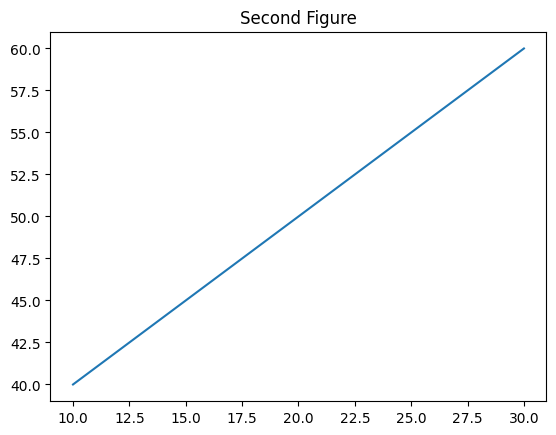

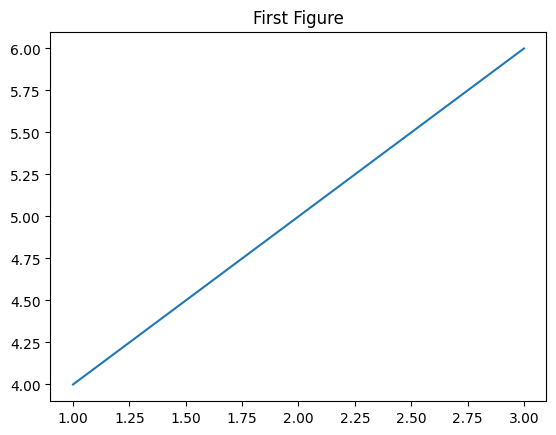

Here


In [12]:
import matplotlib.pyplot as plt

# Create the first figure and plot something
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("First Figure")

# Get the current figure
fig1 = plt.gcf()
print(fig1.number)
# Create another figure and plot something different
plt.figure(fig1.number + 1)
plt.plot([10, 20, 30], [40, 50, 60])
plt.title("Second Figure")

# Get the new current figure
fig2 = plt.gcf()

# Modify the first figure
# plt.figure(fig1.number)  # Switch back to the first figure
# plt.xlabel("X-axis Label for First Figure")

# Modify the second figure
# plt.figure(fig2.number)  # Switch back to the second figure
# plt.xlabel("X-axis Label for Second Figure")

plt.figure(fig1.number)  # Switch back to the first figure
plt.show()
print("Here")

<Figure size 640x480 with 0 Axes>

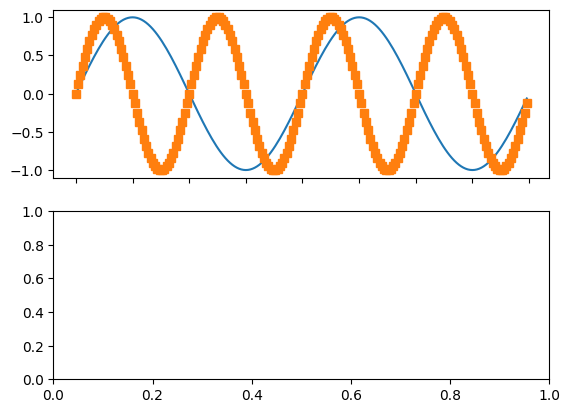

In [10]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2 * np.pi * t)
s2 = np.sin(4 * np.pi * t)

plt.figure(1)
plt.subplot(211)
plt.plot(t, s1)
plt.subplot(212)
# plt.plot(t, 2 * s1)

plt.figure(2)
# plt.plot(t, s2)

plt.figure(1)
plt.subplot(211)
plt.plot(t, s2, "s")
ax = plt.gca()
ax.set_xticklabels([])

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2 * np.pi * t)
s2 = np.sin(4 * np.pi * t)

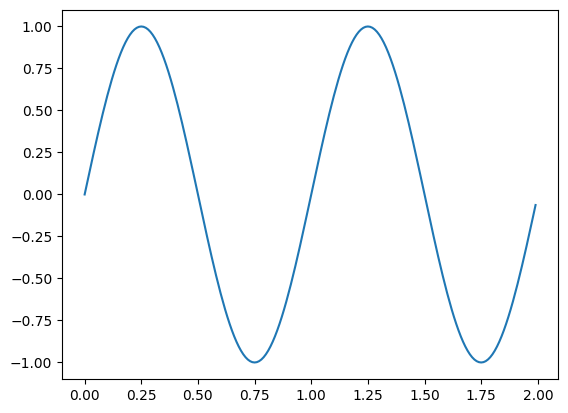

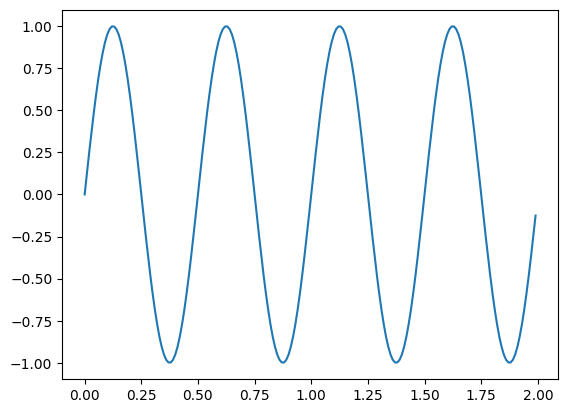

Here


<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(1)
plt.plot(t, s1)

plt.figure(2)
plt.plot(t, s2)

plt.show()

print("Here")

plt.figure(1)
plt.show()